In [5]:
import numpy as np
from scipy.signal import hilbert
import matplotlib.pyplot as plt

import sys, os
sys.path.append(os.path.abspath(".."))

from scripts.simulation import ar, rossler

In [6]:
t_ros, ROS = rossler.simulate(wx=1, start=200, seed=1)
t_ar, AR = ar.simulate(phi=[0.9], seed=1)
print(ROS.shape, AR.shape)

(1000, 6) (1000, 1)


In [7]:
ros_analytical = hilbert(ROS[:,0])
ar_analytical = hilbert(AR[:,0])

ros_phase = np.unwrap(np.angle(ros_analytical))
ar_phase = np.unwrap(np.angle(ar_analytical))

ros_velocity = np.diff(ros_phase)
ar_velocity = np.diff(ar_phase)

print(ros_phase.shape, ar_phase.shape)
print(ros_velocity.shape, ar_velocity.shape)

(1000,) (1000,)
(999,) (999,)


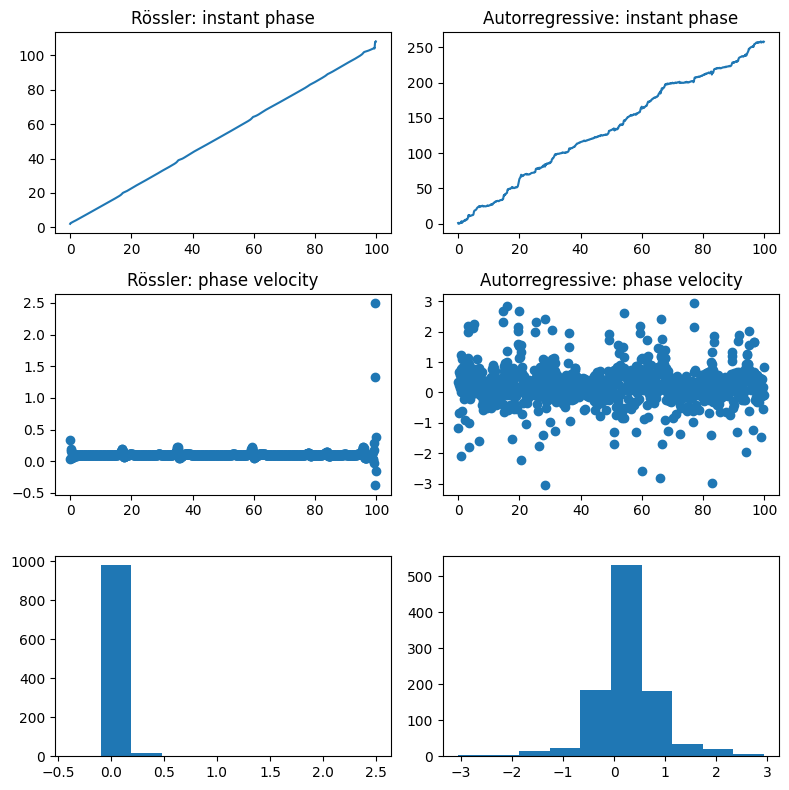

In [8]:
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(8,8))
axs[0,0].plot(t_ros, ros_phase)
axs[0,0].set_title("Rössler: instant phase")
axs[0,1].plot(t_ar, ar_phase)
axs[0,1].set_title("Autorregressive: instant phase")
axs[1,0].scatter(t_ros[:-1], ros_velocity)
axs[1,0].set_title("Rössler: phase velocity")
axs[1,1].scatter(t_ar[:-1], ar_velocity)
axs[1,1].set_title("Autorregressive: phase velocity")
axs[2,0].hist(ros_velocity)
axs[2,1].hist(ar_velocity)
plt.tight_layout()
plt.show()